# Aplicação de um MLP em um dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [56]:
dataset = pd.read_csv('Data.csv')

X_train, X_test, y_train, y_test = train_test_split(
        dataset.drop(['Output1', 'Output2'],axis=1), 
        dataset[['Output1', 'Output2']], test_size=0.30, 
        random_state=101)

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

Alterando os parâmetros abaixo (incluindo a arquitetura da rede) irá ocasionar diferentes resultados.

In [58]:
shape = (3, 4, 2)
learn_rate = 0.5
epochs = 5000
n_records, n_features = X_train.shape

In [67]:
weights = [np.random.randn(y, x) 
           for x, y in zip(shape[:-1], shape[1:])]

biases = [np.random.randn(x)
          for x in shape[1:]]

print("Formato dos pesos: ", (len(weights), *list(w.shape for w in weights)))
print("Formato dos biases: ", (len(biases), *list(b.shape for b in biases)))

Formato dos pesos:  (2, (4, 3), (2, 4))
Formato dos biases:  (2, (4,), (2,))


Para utilizar os mesmos pesos da solução do professor basta utilizar o trecho abaixo:

In [60]:
weights = [
    np.array([[-0.08,  0.08, -0.03, 0.03],
              [ 0.05,  0.10,  0.07, 0.02],
              [-0.07,  0.04, -0.01, 0.01]]).T,
    np.array([[-0.18,  0.11],
              [-0.09,  0.05],
              [-0.04,  0.05],
              [-0.02,  0.07]]).T
]

biases = [
    np.zeros(4),
    np.zeros(2)
]

print("Formato dos pesos: ", (len(weights), *list(w.shape for w in weights)))
print("Formato dos biases: ", (len(biases), *list(b.shape for b in biases)))

Formato dos pesos:  (2, (4, 3), (2, 4))
Formato dos biases:  (2, (4,), (2,))


In [61]:
def feedforward(x, weights, biases):
    """
    Executa o passo forward da rede, e retorna as
    ativações (e produtos) da rede em todas as camadas.
    """
    activations = [x]
    activation = x
    inner_products = []
    
    for w, b in zip(weights, biases):
        z = np.dot(activation, w.T)
        activation = sigmoid(z)
        
        inner_products.append(z)
        activations.append(activation)
        
    return activations, inner_products

Para o algoritmo de backpropagation, foram utilizadas as equações:

$$
\begin{eqnarray} 
  \delta^L = (a^L-y) \odot \sigma'(z^L).
\tag{1}\end{eqnarray}
$$

e

$$
\begin{eqnarray} 
  \delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l),
\tag{2}\end{eqnarray}
$$

$(1)$ representa o erro na camada de saída $L$, ao passo que $(2)$ representa o erro em função do erro na camada posterior à camada atual $l$. O símbolo $\odot$ representa a multiplicação item à item.

In [62]:
def backpropagate(x, y, weights, biases):
    """
    Executa o algoritmo de backpropagation, retornando
    as taxas de atualização dos pesos (deltas).
    """
    
    activations, products = feedforward(x, weights, biases)
    # inicializa o vetor de termos de erros, para que as camadas possam
    # ser preenchidas na ordem correta.
    delta_w = [np.zeros(w.shape) for w in weights]
    
    error_term = (y - activations[-1]) * sigmoid_prime(products[-1])
    
    delta_w[-1] = error_term * activations[-2].reshape(-1, 1)
    
    for l in range(2, len(shape)):
        error_term = np.dot(weights[-l + 1].T, error_term) * sigmoid_prime(products[-l])
        
        delta_w[-l] = error_term * activations[-l-1].reshape(-1, 1)
        
    return delta_w

In [63]:
def train(X, y, weights, biases, epochs=10, learn_rate=0.05):
    last_loss = None
    history = []
    error_index = []

    _weights = weights.copy()
    _biases = biases.copy()
    for epoch in range(epochs):
        delta_w = [np.zeros(w.shape) for w in weights]
        for x, y in zip(X_train.values, y_train.values):
            output = feedforward(x, weights, biases)[0][-1]
            delta_w = [d + d_.T for d, d_ in zip(delta_w, backpropagate(x, y, weights, biases))]

        weights = [w + learn_rate * d / n_records
                   for w, d in zip(weights, delta_w)]
        
        if  epoch % (epochs / 20) == 0:
            output = feedforward(x, weights, biases)[0][-1]
            loss = np.mean((output - y) ** 2)

            if last_loss and last_loss < loss:
                print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
            else:
                print("Erro quadrático no treinamento: ", loss)
            last_loss = loss

            history.append(loss)
            error_index.append(epoch)
            
    return error_index, history

In [68]:
error_index, history = train(X_train, y_train, weights, biases, epochs)

Erro quadrático no treinamento:  0.4127240535710804
Erro quadrático no treinamento:  0.33406685629264204
Erro quadrático no treinamento:  0.2898280421683847
Erro quadrático no treinamento:  0.2581194380581065
Erro quadrático no treinamento:  0.227079044781264
Erro quadrático no treinamento:  0.19543031840052336
Erro quadrático no treinamento:  0.1657991596098347
Erro quadrático no treinamento:  0.14025284160690699
Erro quadrático no treinamento:  0.11922381482477709
Erro quadrático no treinamento:  0.10226099246081462
Erro quadrático no treinamento:  0.08867667672320349
Erro quadrático no treinamento:  0.07780873261376624
Erro quadrático no treinamento:  0.06909349985211674
Erro quadrático no treinamento:  0.06207248298000576
Erro quadrático no treinamento:  0.056380685214104324
Erro quadrático no treinamento:  0.051731496069908796
Erro quadrático no treinamento:  0.047902011476398575
Erro quadrático no treinamento:  0.044719892955139416
Erro quadrático no treinamento:  0.0420521986477

##  Gráfico da Evolução do Erro

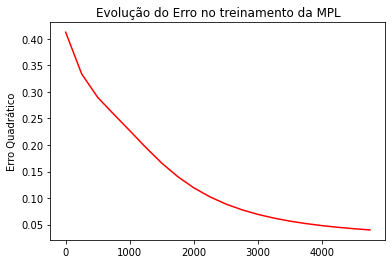

In [69]:
plt.plot(error_index, history, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação

In [71]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
mse_output1 = 0
mse_output2 = 0

for x, y in zip(X_test.values, y_test.values):
    output = feedforward(x, weights, biases)[0][-1]

    error = y - output
    mse_output1 += (y[0] - output[0]) ** 2
    mse_output2 += (y[1] - output[1]) ** 2
          
#Erro Quadrático Médio 
mse_output1 /= n_records 
mse_output2 /= n_records  

print('Erro Quadrático Médio da Saída Output1 é:', mse_output1)
print('Erro Quadrático Médio da Saída Output2 é:', mse_output2)

Erro Quadrático Médio da Saída Output1 é: 0.04304683356453334
Erro Quadrático Médio da Saída Output2 é: 0.07533197849762374
